# Basic usage

In [1]:
%matplotlib notebook

In [2]:
# imports
from importlib import reload

from kcwitools import io as kcwi_io
from kcwitools import utils as kcwi_u
from kcwitools import image as kcwi_img
from kcwitools import plot as kcwi_p
from kcwitools import spec as kcwi_s

/home/xavier/local/Python/kcwitools/kcwitools/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.

## Open a datacube

### Flux

In [3]:
data_file = 'test.fits'
var_file = 'test_var.fits'

In [4]:
hdr, flux = kcwi_io.open_kcwi_cube(data_file)
_, var = kcwi_io.open_kcwi_cube(var_file)

In [5]:
flux.shape

(2597, 70, 55)

### Wavelengths

In [6]:
wave = kcwi_u.build_wave(hdr)

In [7]:
wave

array([3228.93200703, 3229.93226033, 3230.93251365, ..., 5823.61421686,
       5824.61448459, 5825.61475233])

## Show a white-light image

### Build

In [8]:
reload(kcwi_img)
whiteim = kcwi_img.build_whitelight(hdr,flux)

### Show

<IPython.core.display.Javascript object>


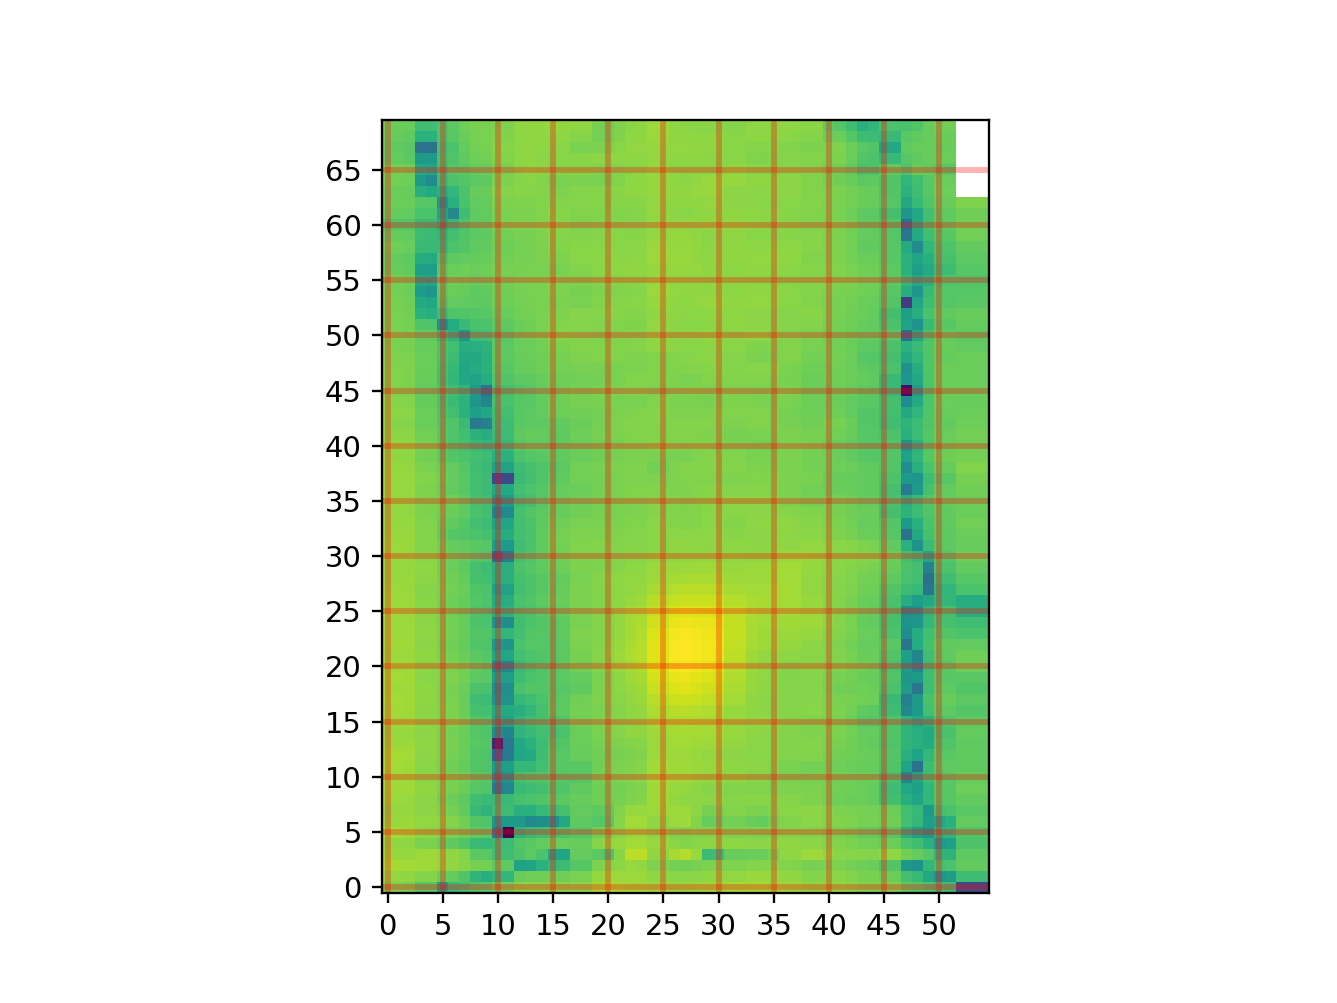

In [9]:
reload(kcwi_p)
kcwi_p.show_whitelight(whiteim)

## Narrow Band image

### Generate an [OII] image

In [10]:
z = 0.3214

In [11]:
reload(kcwi_img)
nb_OII = kcwi_img.build_narrowband(hdr, flux, 3728.5, z=z, sub_offimage=True)

### Show

<IPython.core.display.Javascript object>


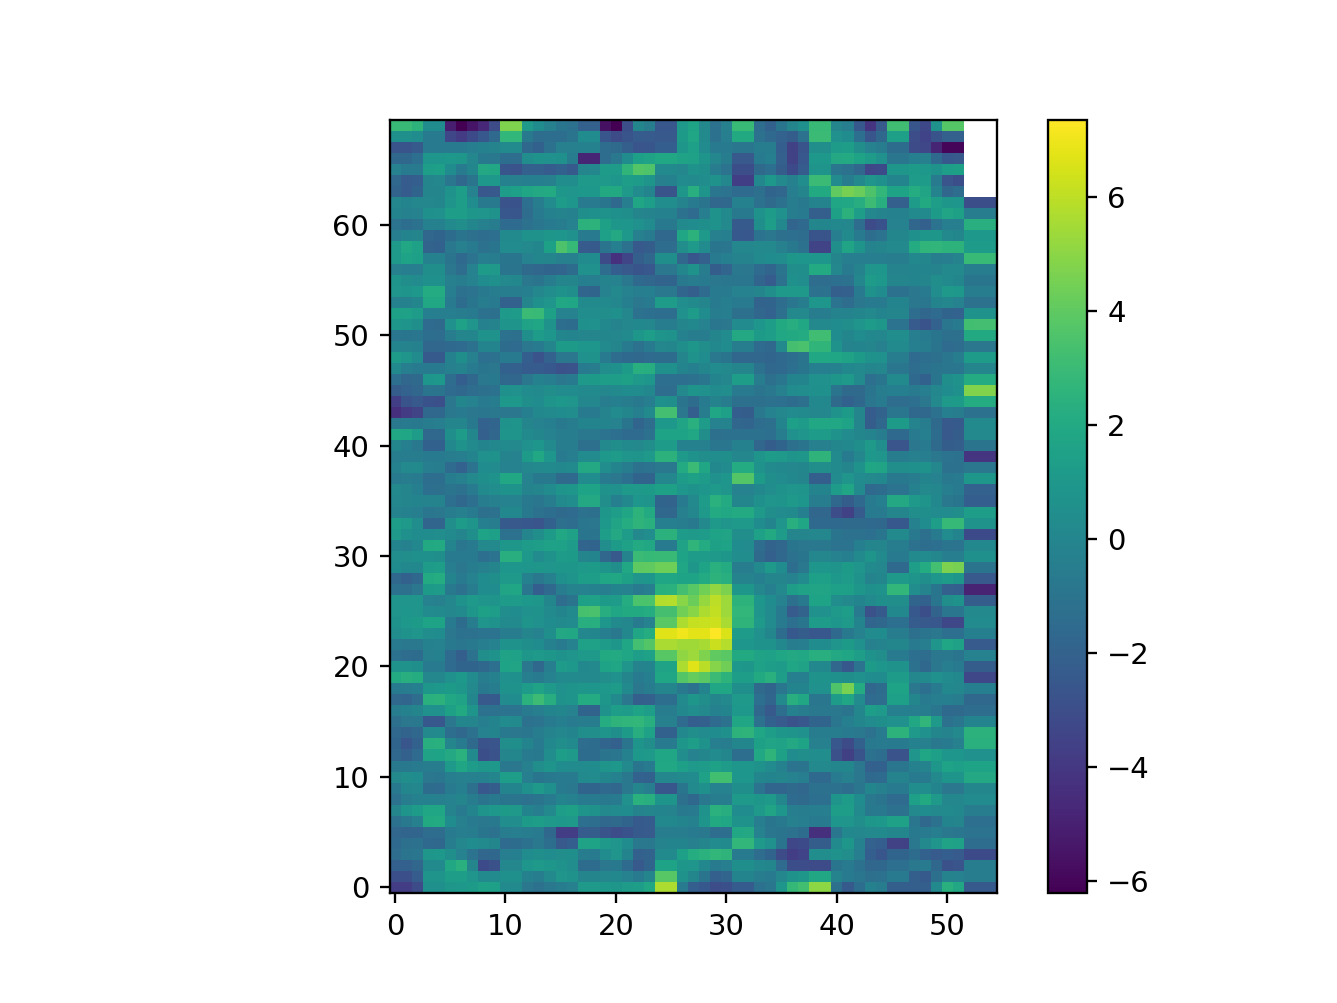

In [12]:
reload(kcwi_p)
kcwi_p.show_narrowband(nb_OII)

### And another

In [13]:
z2 = 0.38413

In [14]:
nb_z2 = kcwi_img.build_narrowband(hdr, flux, 3728.5, z=z2, sub_offimage=True)

<IPython.core.display.Javascript object>


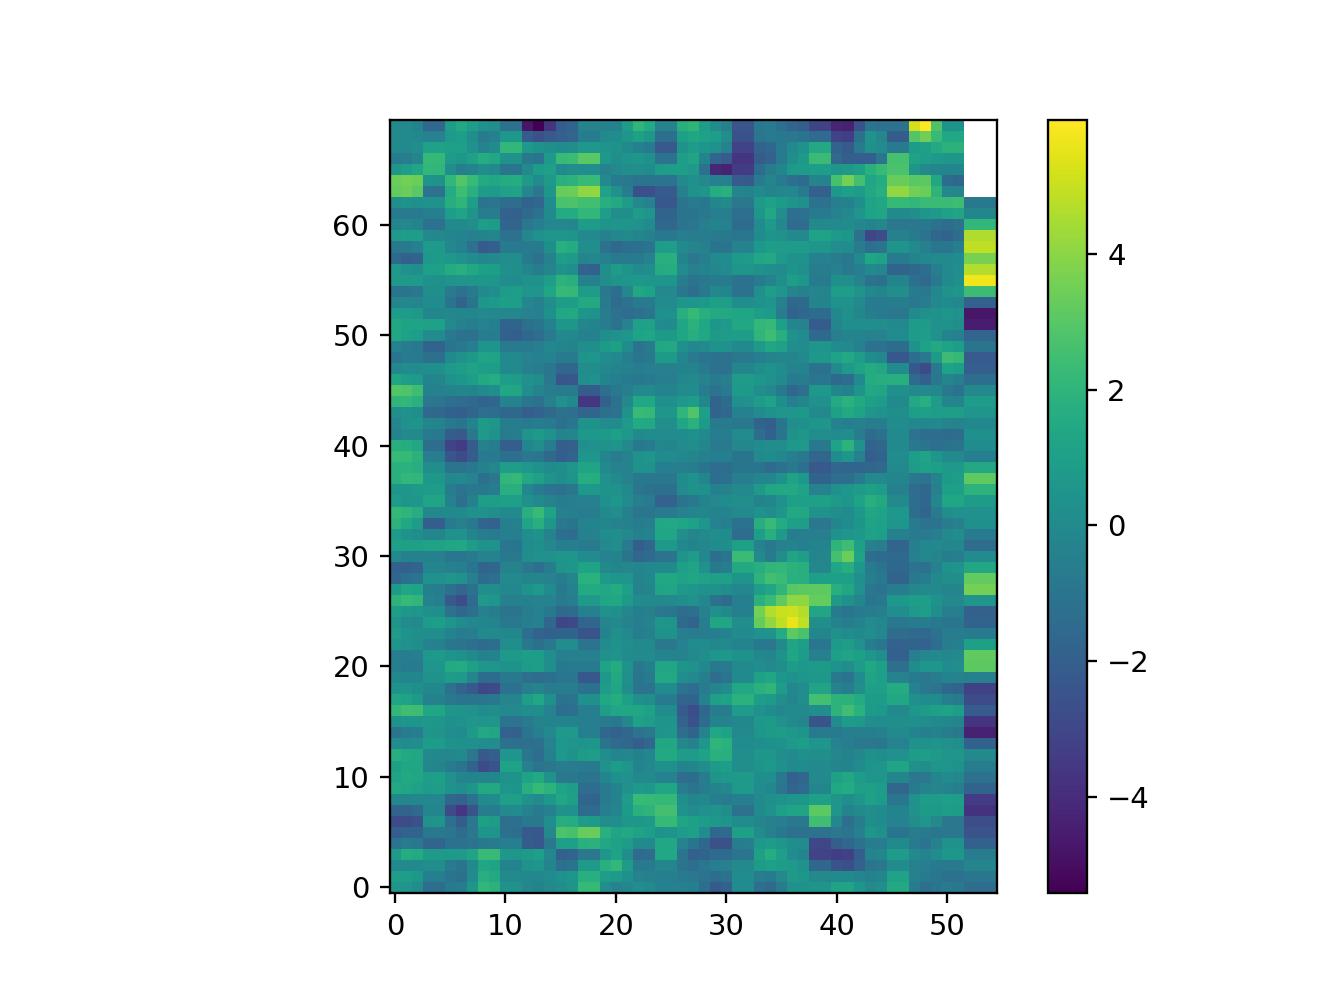

In [15]:
kcwi_p.show_narrowband(nb_z2)

## Extract

In [16]:
reload(kcwi_s)
xspec = kcwi_s.extract_square(28, 23, wave, flux, var)

/home/xavier/local/Python/kcwitools/kcwitools/spec.py:38: RuntimeWarning: invalid value encountered in sqrt
  err_spec = np.sqrt(np.sum(sub_var, axis=(1,2)))
/home/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:108: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


<IPython.core.display.Javascript object>


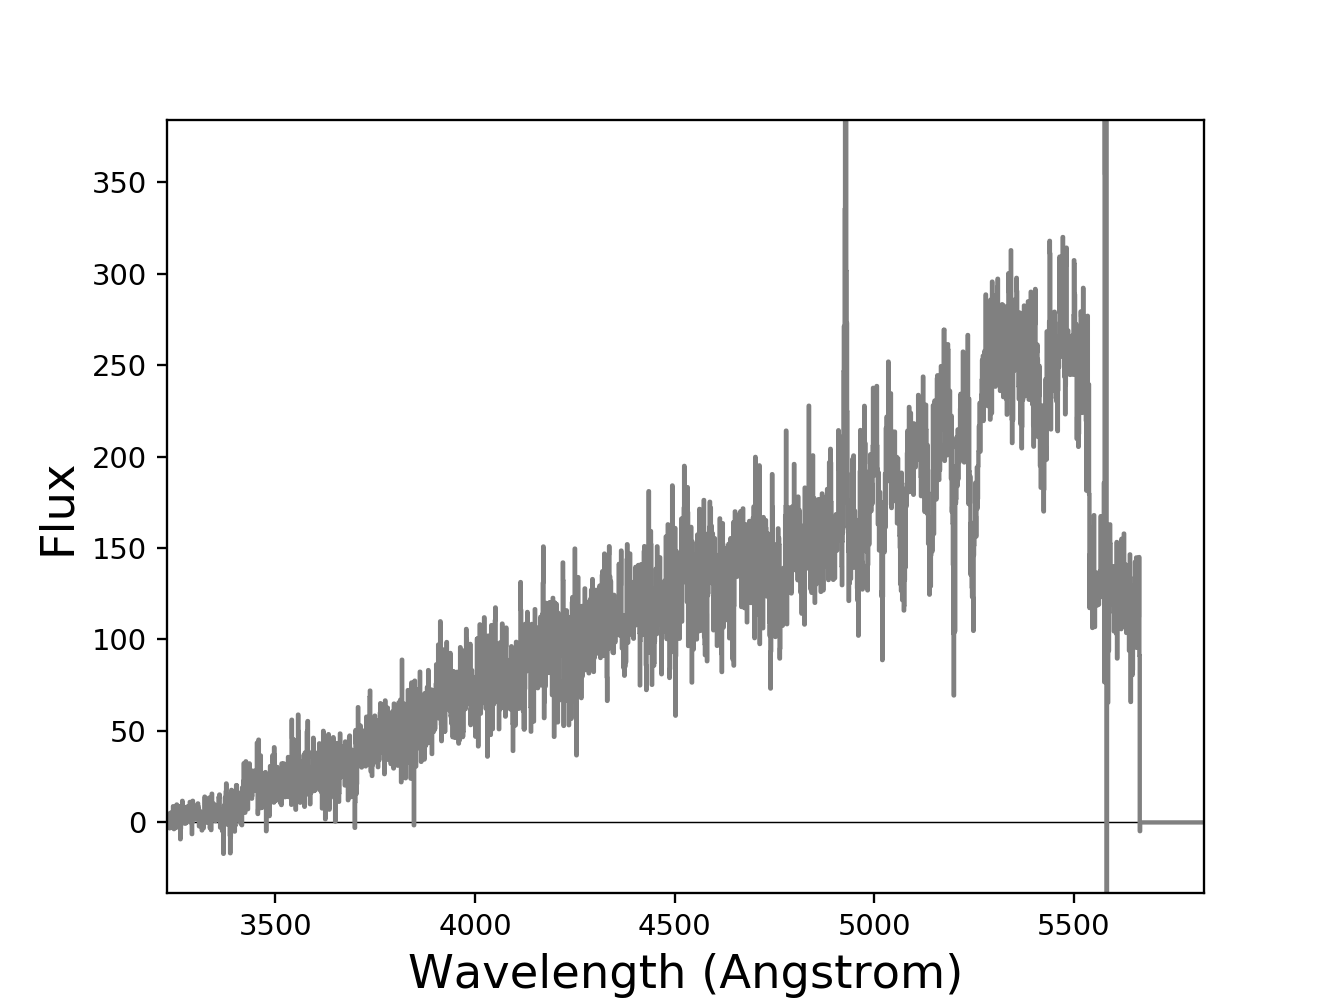

In [18]:
xspec.plot()